### start
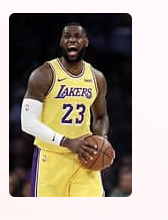

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
driver = webdriver.Chrome()
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import math

# Configure Chrome options for headless browsing
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options = options)
# Now you can use the driver to interact with web pages
driver.get('https://www.statmuse.com/nba')


name = input('What Player: ')

driver.find_element(By.XPATH,'//*[@id="home"]/div[3]/div[2]/div/ask-bar/form/div/div[1]/textarea').send_keys(name + " home stats")
driver.find_element(By.XPATH, '//*[@id="home"]/div[3]/div[2]/div/ask-bar/form/div/div[1]/input').click()
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')


stats = soup.find_all(attrs={"class": "text-sm font-semibold"})


for stat in stats:
    row_content = stat.find_all("td")
    homePPG = float(row_content[8].text.strip())
    homeRPG = float(row_content[9].text.strip())
    homeAPG = float(row_content[10].text.strip())
    homeSPG = float(row_content[11].text.strip())
    homeBPG = float(row_content[12].text.strip())
    homeTOVPG = float(row_content[13].text.strip())
    homeFGPG = float(row_content[16].text.strip())
    break

driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/a').click()


driver.find_element(By.XPATH,'//*[@id="home"]/div[3]/div[2]/div/ask-bar/form/div/div[1]/textarea').send_keys(name + " away stats")
driver.find_element(By.XPATH, '//*[@id="home"]/div[3]/div[2]/div/ask-bar/form/div/div[1]/input').click()
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')


stats = soup.find_all(attrs={"class": "text-sm font-semibold"})


for stat in stats:
    row_content = stat.find_all("td")
    awayPPG = float(row_content[8].text.strip())
    awayRPG = float(row_content[9].text.strip())
    awayAPG = float(row_content[10].text.strip())
    awaySPG = float(row_content[11].text.strip())
    awayBPG = float(row_content[12].text.strip())
    awayTOVPG = float(row_content[13].text.strip())
    awayFGPG = float(row_content[16].text.strip())
    break
    

ppg = ((awayPPG - homePPG)/ homePPG) * 100
ppg = math.ceil(ppg*100)/100

rpg = ((awayRPG - homeRPG)/ homeRPG) * 100
rpg = math.ceil(rpg*100)/100

apg = ((awayAPG - homeAPG)/ homeAPG) * 100
apg = math.ceil(apg*100)/100

spg = ((awaySPG - homeSPG)/ homeSPG) * 100
spg = math.ceil(spg*100)/100

bpg = ((awayBPG - homeBPG)/ homeBPG) * 100
bpg = math.ceil(bpg*100)/100

tovpg = ((awayTOVPG - homeTOVPG)/ homeTOVPG) * 100
tovpg = math.ceil(tovpg*100)/100

fgpg = ((awayFGPG - homeFGPG)/ homeFGPG) * 100
fgpg = math.ceil(fgpg*100)/100



print(name, 'on the road had a ',ppg, 'percent change in points\n ', rpg, 'percent change in rebounds\n ', apg, 'percent change in assists\n ', spg, 'percent change in steals\n ', bpg, 'percent change in bpg\n ', tovpg, 'percent change in tov\n ',fgpg, 'percent change in fgpg\n') 




Lebron James had a  8.31 percent change in points
  7.5 percent change in rebounds
  -9.72 percent change in assists
  25.0 percent change in steals
  -28.57 percent change in bpg
  37.04 percent change in tov
  2.23 percent change in fgpg

